In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [5]:
pip install scikit-learn


     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     - -------------------------------------- 0.5/11.1 MB 14.2 MB/s eta 0:00:01
     --- ------------------------------------ 1.1/11.1 MB 16.6 MB/s eta 0:00:01
     ------ --------------------------------- 1.7/11.1 MB 15.5 MB/s eta 0:00:01
     -------- ------------------------------- 2.4/11.1 MB 17.3 MB/s eta 0:00:01
     ----------- ---------------------------- 3.1/11.1 MB 15.4 MB/s eta 0:00:01
     --------------- ------------------------ 4.3/11.1 MB 17.0 MB/s eta 0:00:01
     ------------------- -------------------- 5.3/11.1 MB 17.9 MB/s eta 0:00:01
     -------------------- ------------------- 5.7/11.1 MB 17.4 MB/s eta 0:00:01
     ---------------------- ----------------- 6.2/11.1 MB 16.5 MB/s eta 0:00:01
     ------------------------- -------------- 7.1/11.1 MB 16.7 MB/s eta 0:00:01
     ---------------------------- ----------- 7.8/11.1 MB 17.2 MB/s eta 0:00:01
     --------------------------------- ------ 9


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\bhanu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [38]:
import pandas as pd
import zipfile

# Path to the ZIP file
df = pd.read_excel(r"C:\Users\bhanu\Downloads\default+of+credit+card+clients\default of credit card clients.xls",header=0)


In [39]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [41]:
df.rename({'default payment next month':'DEFAULT'},axis='columns',inplace=True)

In [42]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [45]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [48]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [49]:
df_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [51]:
len(df_missing)

29932

In [61]:
df_default = df_missing.loc[df_missing['DEFAULT']==0]
df_no_default = df_missing.loc[df_missing['DEFAULT']!=0]

In [62]:
df_no_default_downsample = resample(df_no_default, replace = False, n_samples = 1000, random_state=42)
len(df_no_default_downsample)

1000

In [63]:
df_default_downsample = resample(df_default, replace = False, n_samples = 1000, random_state=42)
len(df_default_downsample)

1000

In [65]:
df_downsample = pd.concat([df_no_default_downsample, df_default_downsample])
len(df_downsample)

2000

In [66]:
X = df_downsample.drop('DEFAULT', axis = 1).copy()

In [67]:
y = df_downsample['DEFAULT'].copy()

In [70]:
X_encoded = pd.get_dummies(X, columns = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [71]:
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,...,0,0,0,0,1,0,0,0,0,0
19350,80000,36,19671,20650,0,0,0,0,1700,0,...,0,1,0,0,0,0,0,0,0,0
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,...,0,0,0,1,0,0,0,0,0,0
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,...,0,0,0,0,1,0,0,0,0,0
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,...,0,1,0,0,0,0,0,0,0,0


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, y, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, Y_train)

SVC(random_state=42)

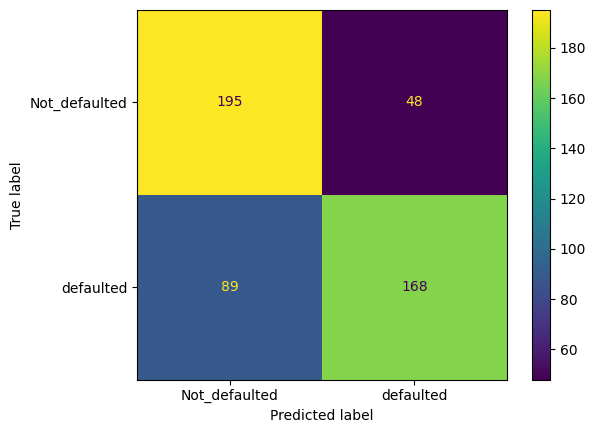

In [78]:
ConfusionMatrixDisplay.from_estimator(clf_svm,X_test_scaled,Y_test,display_labels=['Not_defaulted','defaulted'])

In [91]:
param_grid = [
    {
        'C':[10,100,50], 'gamma':['scale',0.001,0.0001], 'kernel':['rbf'],
    }
]
optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring = 'accuracy',verbose = 0)
optimal_params.fit(X_train_scaled, Y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [92]:
clf_svm = SVC(random_state = 42, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, Y_train)

SVC(C=100, gamma=0.001, random_state=42)

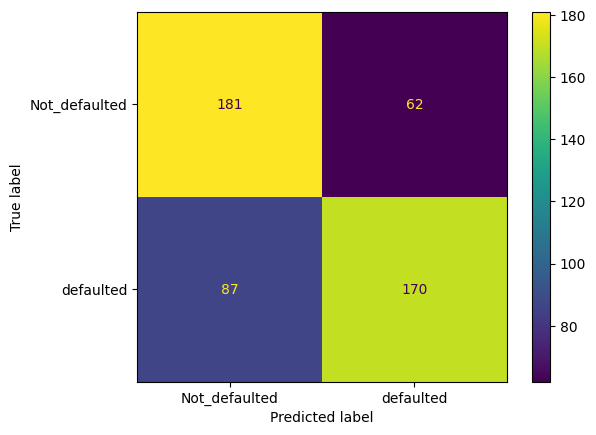

In [93]:
ConfusionMatrixDisplay.from_estimator(clf_svm,X_test_scaled,Y_test,display_labels=['Not_defaulted','defaulted'])

In [94]:
import os
print(os.getcwd())


C:\Users\bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\Scripts
